In [2]:
#import machine learning libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns

In [31]:
#read dataset
data=pd.read_csv("./heart.csv")

#print out the first 10 rows of the dataset
data.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
#features of data 

#age - in years
#sex - (1 = male; 0 = female)
#cp - chest pain type
#trestbps - resting blood pressure (in mm Hg on admission to the hospital)
#chol - serum cholestoral in mg/dl
#fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg - resting electrocardiographic results
#thalach - maximum heart rate achieved
#exang - exercise induced angina (1 = yes; 0 = no)
#oldpeak - ST depression induced by exercise relative to rest
#slope - the slope of the peak exercise ST segment
#ca - number of major vessels (0-3) colored by flourosopy
#thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
#target - 1 or 0

In [5]:
#Detect any null values

data.isnull().values.any()

False

In [6]:
#Data types of the data
data.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exang         int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [7]:
#Measures of central tendancies of the data i.e. mean, standard deviation
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exang,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


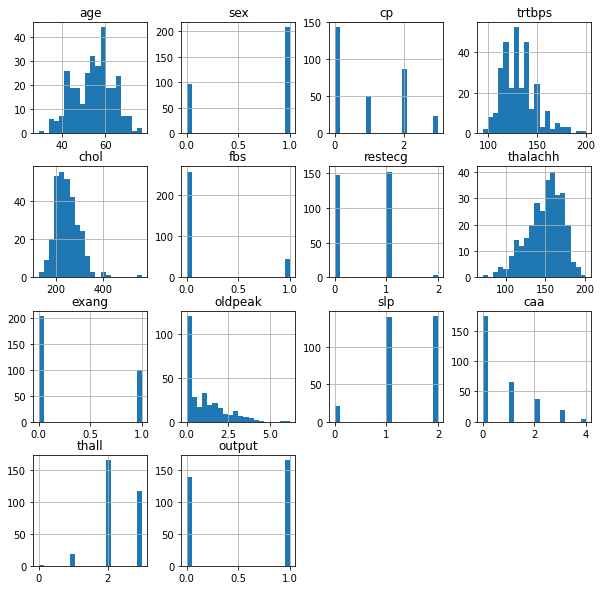

In [8]:
#histograms of various features of the data
data.hist(bins=20,figsize=(10,10))
plt.show()

<AxesSubplot:>

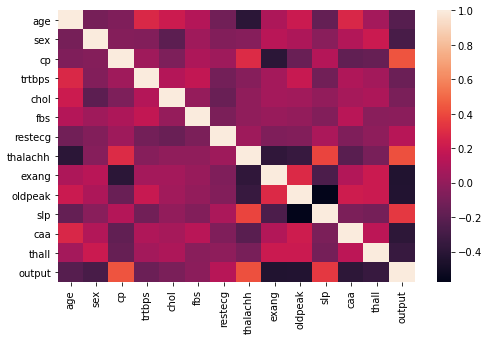

In [10]:
#correlation matrix
plt.figure(figsize=(8,5))
sns.heatmap(data.corr())

#In plot we can see there is higher correlation between output and cp (chest pain), output and thalach (heart rate)
#some attributes are independent to each other also as there is near 0 correlation

In [14]:
#outlier removal process.
#IQR inter quartile range

Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

print((data < (Q1 - 1.5 * IQR))|(data > (Q3 + 1.5 * IQR)))


age         13.5
sex          1.0
cp           2.0
trtbps      20.0
chol        63.5
fbs          0.0
restecg      1.0
thalachh    32.5
exang        1.0
oldpeak      1.6
slp          1.0
caa          1.0
thall        1.0
output       1.0
dtype: float64
       age    sex     cp  trtbps   chol    fbs  restecg  thalachh  exang  \
0    False  False  False   False  False   True    False     False  False   
1    False  False  False   False  False  False    False     False  False   
2    False  False  False   False  False  False    False     False  False   
3    False  False  False   False  False  False    False     False  False   
4    False  False  False   False  False  False    False     False  False   
..     ...    ...    ...     ...    ...    ...      ...       ...    ...   
298  False  False  False   False  False  False    False     False  False   
299  False  False  False   False  False  False    False     False  False   
300  False  False  False   False  False   True    False     Fal

In [15]:
# removal of record that are not within range
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape,data_out.shape
#more than 80 records deleted

((303, 14), (228, 14))

In [17]:
#extract feature and output
X=data_out.drop(columns=['output'])

#specifying the output
y=data_out['output']

In [18]:
#split the dataset into train and test 15%
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=5)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((193, 13), (35, 13), (193,), (35,))

In [30]:
#Prediction using Logistic Regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score

clf=LogisticRegression(solver='newton-cg', max_iter=1000)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 0.8571428571428571
ROC AUC score 0.8465909090909091


In [20]:
#Support Vector Machine Classifier
from sklearn.svm import SVC

clf=SVC(kernel='linear',gamma='scale')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 0.8571428571428571
ROC AUC score 0.8465909090909091


In [21]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=60)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 0.9142857142857143
ROC AUC score 0.9128787878787877


In [22]:
#K Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 0.7142857142857143
ROC AUC score 0.643939393939394


In [23]:
#Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier(n_estimators=50,learning_rate=0.2)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 0.8857142857142857
ROC AUC score 0.8920454545454546


In [24]:
#Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy score {}".format(accuracy_score(y_test,y_pred)))
print("ROC AUC score {}".format(roc_auc_score(y_test,y_pred)))
#pd.DataFrame(data={"Y_Actual":y_test,"Y_Predict":y_pred})

Accuracy score 0.9428571428571428
ROC AUC score 0.9337121212121212


In [32]:
## Gaussian Naive Bayes gives the highest accuracy of more than 94%